# Import Module and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
event_data = pd.read_csv('data/all_user_event_data.csv')
profile_data = pd.read_csv('data/all_user_profile_data.csv')
repo_data = pd.read_csv('data/all_user_repo_data.csv')
starred_data = pd.read_csv('data/all_user_starred_data.csv')

# Profile Data

In [3]:
profile_data['followers'].fillna(0, inplace=True)
profile_data['following'].fillna(0, inplace=True)
profile_data['public_repos'].fillna(0, inplace=True)
profile_data['public_gists'].fillna(0, inplace=True)
profile_data['hireable'].fillna(False, inplace=True)

In [4]:
profile_data.head()

,user_alias,type,hireable,location,followers,following,public_repos,public_gists,created_at,updated_at
0,usr0,User,False,NaN,2.0,7.0,43.0,0.0,2020-09-07T23:54:51Z,2023-10-05T18:16:01Z
1,usr1,User,False,Tbilisi,3.0,4.0,16.0,0.0,2011-04-16T12:30:37Z,2024-01-08T13:45:16Z
2,usr2,User,False,Karachi,13.0,23.0,44.0,0.0,2023-01-03T13:56:42Z,2023-12-24T05:10:36Z
3,usr3,User,True,Karachi,0.0,0.0,5.0,0.0,2021-09-24T09:04:40Z,2023-05-02T19:11:00Z
4,usr4,User,False,NaN,1.0,0.0,2.0,0.0,2022-10-07T11:01:08Z,2023-12-07T20:03:36Z


In [5]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583 entries, 0 to 8582
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_alias    8583 non-null   object 
 1   type          8583 non-null   object 
 2   hireable      8583 non-null   bool   
 3   location      4667 non-null   object 
 4   followers     8583 non-null   float64
 5   following     8583 non-null   float64
 6   public_repos  8583 non-null   float64
 7   public_gists  8583 non-null   float64
 8   created_at    8583 non-null   object 
 9   updated_at    8583 non-null   object 
dtypes: bool(1), float64(4), object(5)
memory usage: 612.0+ KB


In [6]:
profile_data.describe()

,followers,following,public_repos,public_gists
count,8583.000000,8583.000000,8583.000000,8583.000000
mean,16.635326,15.786089,22.973203,1.331586
std,217.609009,188.551348,43.385435,12.212598
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000
50%,2.000000,2.000000,14.000000,0.000000
75%,8.000000,9.000000,27.000000,0.000000
max,14753.000000,15337.000000,2496.000000,760.000000


In [7]:
profile_data.isnull().sum()

user_alias         0
type               0
hireable           0
location        3916
followers          0
following          0
public_repos       0
public_gists       0
created_at         0
updated_at         0
dtype: int64

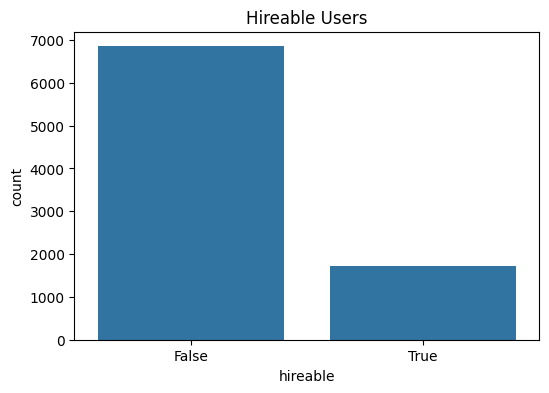

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=profile_data, x='hireable')
plt.title('Hireable Users')
plt.show()

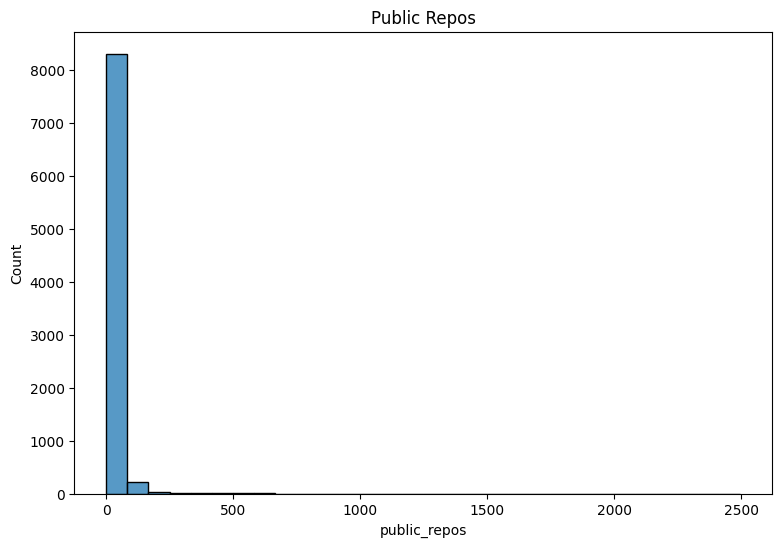

In [9]:
plt.figure(figsize=(9, 6))
sns.histplot(data=profile_data, x='public_repos', bins=30)
plt.title('Public Repos')
plt.show()

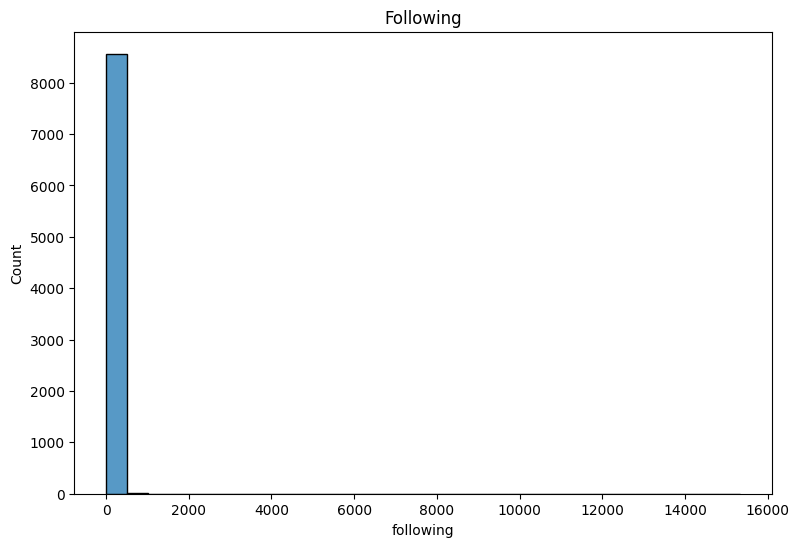

In [10]:
plt.figure(figsize=(9, 6))
sns.histplot(data=profile_data, x='following', bins=30)
plt.title('Following')
plt.show()

In [11]:
log_followers = np.log(profile_data['followers'] + 1)

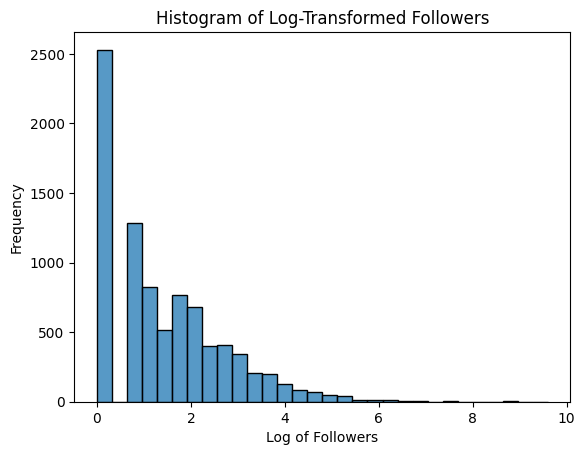

In [12]:
sns.histplot(log_followers, bins=30)

plt.xlabel('Log of Followers')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Followers')

plt.show()

From the histogram of the log-transformed followers, it appears that a significant number of users have between 0 and 2 log of followers. Therefore, for further data analysis I set a threshold at around 4 to focus on users with a higher follower count while retaining a substantial portion of dataset.

In [13]:
threshold = np.exp(4)

In [14]:
threshold

54.598150033144236

In [15]:
high_follower_users = profile_data[profile_data['followers'] > threshold]
low_follower_users = profile_data[profile_data['followers'] <= threshold]

In [16]:
len(profile_data)

8583

In [17]:
len(high_follower_users), len(low_follower_users)

(342, 8241)

# Event Data

In [18]:
event_data.head()

,user_alias,event_type,created_at
0,usr1,PushEvent,2023-10-31T17:57:39Z
1,usr1,CreateEvent,2023-10-30T18:13:26Z
2,usr1,CreateEvent,2023-10-30T17:53:32Z
3,usr2,CreateEvent,2024-01-08T17:29:08Z
4,usr2,CreateEvent,2024-01-08T17:27:38Z


In [19]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185141 entries, 0 to 185140
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_alias  185141 non-null  object
 1   event_type  183512 non-null  object
 2   created_at  183512 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


In [20]:
event_data.describe()

,user_alias,event_type,created_at
count,185141,183512,183512
unique,5844,16,176733
top,usr250,PushEvent,2023-12-11T18:25:02Z
freq,300,105266,11


In [21]:
event_data.isnull().sum()

user_alias       0
event_type    1629
created_at    1629
dtype: int64

In [22]:
event_data = event_data[event_data['event_type'] != 'event_type']

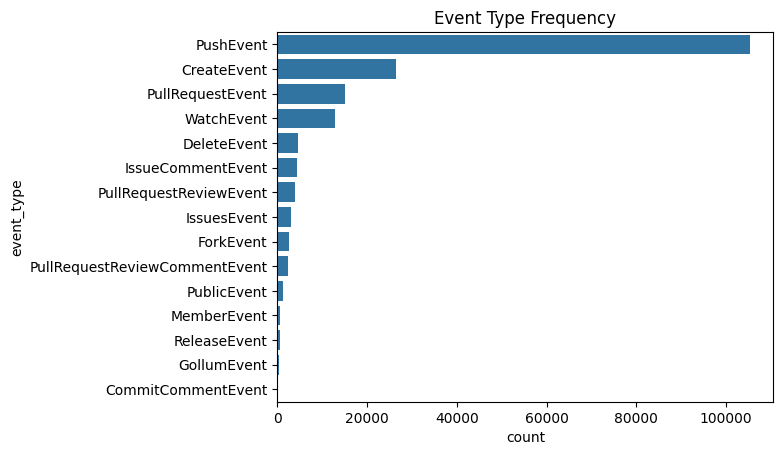

In [23]:
order = event_data['event_type'].value_counts().index
sns.countplot(data=event_data, y='event_type', order=order)
plt.title('Event Type Frequency')
plt.show()

# Repo Data

In [24]:
repo_data['description'].fillna('', inplace=True)
repo_data['topics'].fillna('', inplace=True)
repo_data['stargazers_count'].fillna(0, inplace=True)
repo_data['forks'].fillna(0, inplace=True)
repo_data['fork'].fillna('False', inplace=True)

In [25]:
repo_data.head()

,user_alias,description,fork,stargazers_count,language,topics,forks
0,usr0,,False,0.0,JavaScript,,0.0
1,usr0,,False,0.0,JavaScript,,0.0
2,usr0,,False,0.0,JavaScript,,0.0
3,usr0,,False,0.0,JavaScript,,0.0
4,usr0,,False,0.0,JavaScript,,0.0


In [26]:
repo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181609 entries, 0 to 181608
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_alias        181609 non-null  object 
 1   description       181609 non-null  object 
 2   fork              181609 non-null  object 
 3   stargazers_count  181609 non-null  float64
 4   language          138836 non-null  object 
 5   topics            181609 non-null  object 
 6   forks             181609 non-null  float64
dtypes: float64(2), object(5)
memory usage: 9.7+ MB


In [27]:
repo_data.describe()

,stargazers_count,forks
count,181609.000000,181609.000000
mean,1.579079,0.490670
std,99.100812,26.253115
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,34729.000000,6472.000000


In [28]:
repo_data.isnull().sum()

user_alias              0
description             0
fork                    0
stargazers_count        0
language            42773
topics                  0
forks                   0
dtype: int64

In [29]:
language_counts = repo_data['language'].value_counts()

In [30]:
top_20_languages = language_counts[:20]

repo_data['language_top20'] = repo_data['language'].where(repo_data['language'].isin(top_20_languages.index), 'Other')
repo_data_plot = repo_data[repo_data['language_top20'] != 'Other']

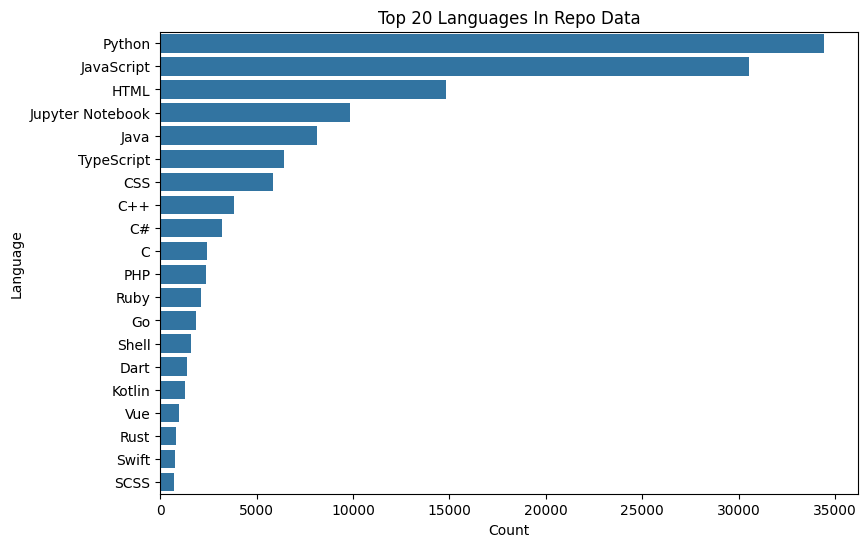

In [31]:
plt.figure(figsize=(9, 6))
sns.countplot(data=repo_data_plot, y='language_top20', order=repo_data_plot['language_top20'].value_counts().index)
plt.title('Top 20 Languages In Repo Data')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [32]:
repo_data['topics'] = repo_data['topics'].str.split('/')

In [33]:
topics_df = repo_data.explode('topics')
topics_df = topics_df[topics_df['topics'] != '']
topics_df = topics_df.drop(['description', 'fork', 'stargazers_count', 'language', 'forks'], axis=1)

In [34]:
topic_counts = topics_df['topics'].value_counts()
top_20_topics = topic_counts[:20]

In [35]:
top_20_topics

topics
python                   2277
config                   1155
github-config            1152
javascript               1136
react                     877
django                    811
css                       665
html                      634
python3                   629
reactjs                   556
nodejs                    463
typescript                441
java                      397
machine-learning          395
html5                     378
docker                    365
api                       330
css3                      324
django-rest-framework     316
mongodb                   304
Name: count, dtype: int64

In [36]:
topics_df['topics_top20'] = topics_df['topics'].where(topics_df['topics'].isin(top_20_topics.index), 'Other')
topics_df = topics_df[topics_df['topics_top20'] != 'Other']

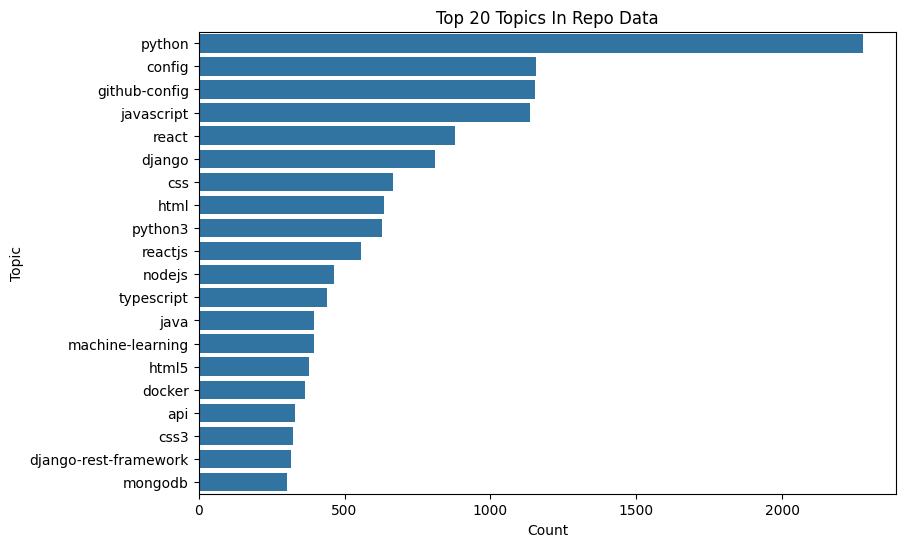

In [37]:
plt.figure(figsize=(9, 6))
sns.countplot(data=topics_df, y='topics_top20', order=topics_df['topics_top20'].value_counts().index)
plt.title('Top 20 Topics In Repo Data')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

In [38]:
repo_data['description'].value_counts()[:20]

description
                                                                                                                                                                            85893
Config files for my GitHub profile.                                                                                                                                          1171
Im now a ALX Student/this is my first repository as a full-stack engineer                                                                                                     185
Created with CodeSandbox                                                                                                                                                      112
A robot powered training repository :robot:                                                                                                                                   108
🚀✨ Help beginners to contribute to open source projects                                           

# Starred Data

In [39]:
starred_data['stargazers_count'].fillna(0, inplace=True)
starred_data['description'].fillna('', inplace=True)
starred_data['topics'].fillna('', inplace=True)

In [40]:
starred_data.head()

,user_alias,full_name,html_url,description,language,topics,stargazers_count
0,usr1,microsoft/PowerToys,https://github.com/microsoft/PowerToys,Windows system utilities to maximize productivity,C#,color-picker/desktop/fancyzones/keyboard-manag...,101541.0
1,usr1,spring-projects/spring-security,https://github.com/spring-projects/spring-secu...,Spring Security,Java,framework/java/security/spring/spring-framework,8207.0
2,usr1,bitwarden/clients,https://github.com/bitwarden/clients,Bitwarden client applications (web/browser ext...,TypeScript,angular/bitwarden/browser-extension/chrome/cli...,7824.0
3,usr1,gothinkster/realworld,https://github.com/gothinkster/realworld,"""The mother of all demo apps"" — Exemplary full...",TypeScript,,77396.0
4,usr1,ch4mpy/spring-addons,https://github.com/ch4mpy/spring-addons,Ease spring OAuth2 resource-servers configurat...,Java,auth0/cognito/hacktoberfest/keycloak/oidc/open...,405.0


In [41]:
starred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118764 entries, 0 to 118763
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_alias        118764 non-null  object 
 1   full_name         118764 non-null  object 
 2   html_url          118764 non-null  object 
 3   description       118764 non-null  object 
 4   language          105256 non-null  object 
 5   topics            118764 non-null  object 
 6   stargazers_count  118764 non-null  float64
dtypes: float64(1), object(6)
memory usage: 6.3+ MB


In [42]:
starred_data.describe()

,stargazers_count
count,118764.000000
mean,17708.702662
std,44373.975964
min,0.000000
25%,26.000000
50%,1411.000000
75%,13295.000000
max,381613.000000


In [43]:
starred_data.isnull().sum()

user_alias              0
full_name               0
html_url                0
description             0
language            13508
topics                  0
stargazers_count        0
dtype: int64

In [44]:
language_counts = starred_data['language'].value_counts()

In [45]:
top_20_languages = language_counts[:20]

starred_data['language_top20'] = starred_data['language'].where(starred_data['language'].isin(top_20_languages.index), 'Other')
starred_data_plot = starred_data[starred_data['language_top20'] != 'Other']

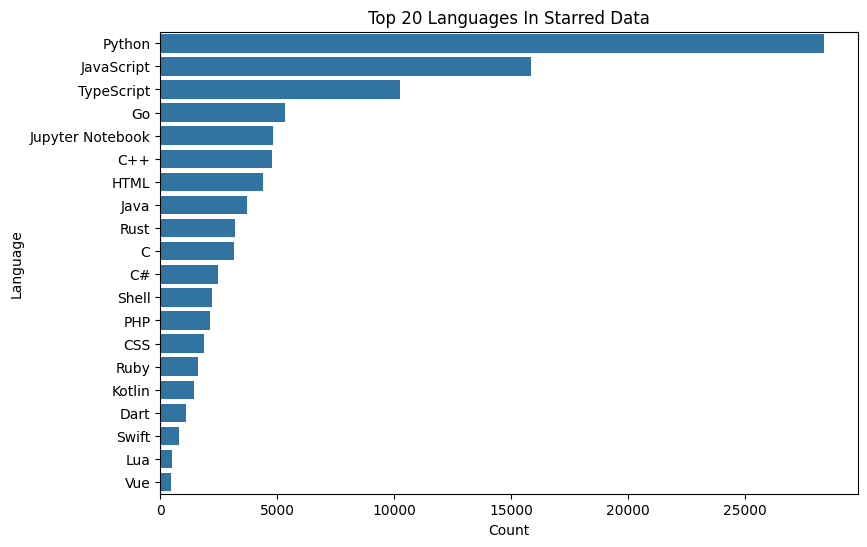

In [46]:
plt.figure(figsize=(9, 6))
sns.countplot(data=starred_data_plot, y='language_top20', order=starred_data_plot['language_top20'].value_counts().index)
plt.title('Top 20 Languages In Starred Data')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [47]:
starred_data['topics'] = starred_data['topics'].str.split('/')

In [48]:
topics_df = starred_data.explode('topics')
topics_df = topics_df[topics_df['topics'] != '']
topics_df = topics_df.drop(['full_name', 'html_url', 'description', 'stargazers_count', 'language'], axis=1)

In [49]:
topic_counts = topics_df['topics'].value_counts()
top_20_topics = topic_counts[:20]

In [50]:
top_20_topics

topics
python              14503
hacktoberfest       10360
javascript           8135
react                5173
machine-learning     4168
typescript           3555
deep-learning        3375
nodejs               2863
golang               2803
awesome-list         2780
awesome              2658
go                   2642
rust                 2547
django               2241
android              2226
docker               2173
linux                2091
python3              2073
css                  2066
api                  1946
Name: count, dtype: int64

In [51]:
topics_df['topics_top20'] = topics_df['topics'].where(topics_df['topics'].isin(top_20_topics.index), 'Other')
topics_df = topics_df[topics_df['topics_top20'] != 'Other']

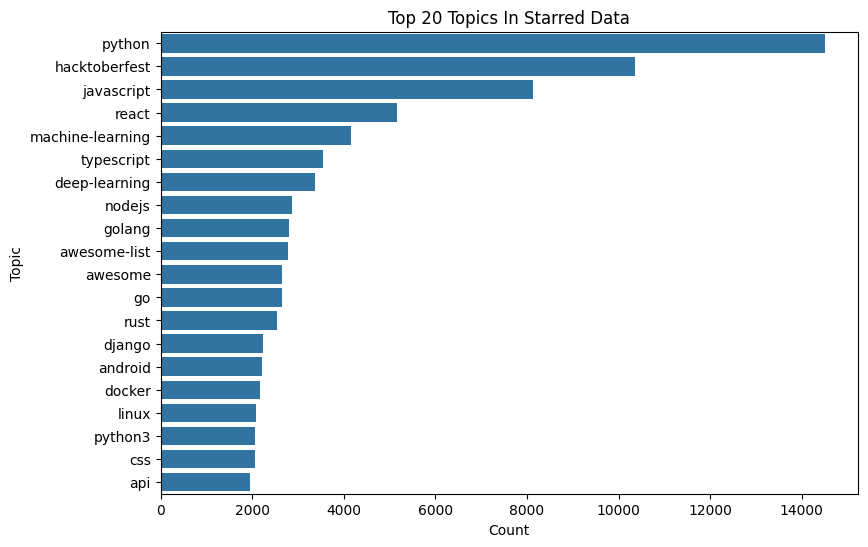

In [52]:
plt.figure(figsize=(9, 6))
sns.countplot(data=topics_df, y='topics_top20', order=topics_df['topics_top20'].value_counts().index)
plt.title('Top 20 Topics In Starred Data')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

In [53]:
starred_data['full_name'].value_counts()[:20]

full_name
public-apis/public-apis                       322
kamranahmedse/developer-roadmap               267
TheAlgorithms/Python                          247
EbookFoundation/free-programming-books        246
jwasham/coding-interview-university           236
vinta/awesome-python                          229
django/django                                 223
donnemartin/system-design-primer              203
tiangolo/fastapi                              198
codecrafters-io/build-your-own-x              192
freeCodeCamp/freeCodeCamp                     154
sindresorhus/awesome                          147
trekhleb/javascript-algorithms                144
facebook/react                                141
practical-tutorials/project-based-learning    141
ossu/computer-science                         137
torvalds/linux                                130
python/cpython                                126
anuraghazra/github-readme-stats               118
encode/django-rest-framework            

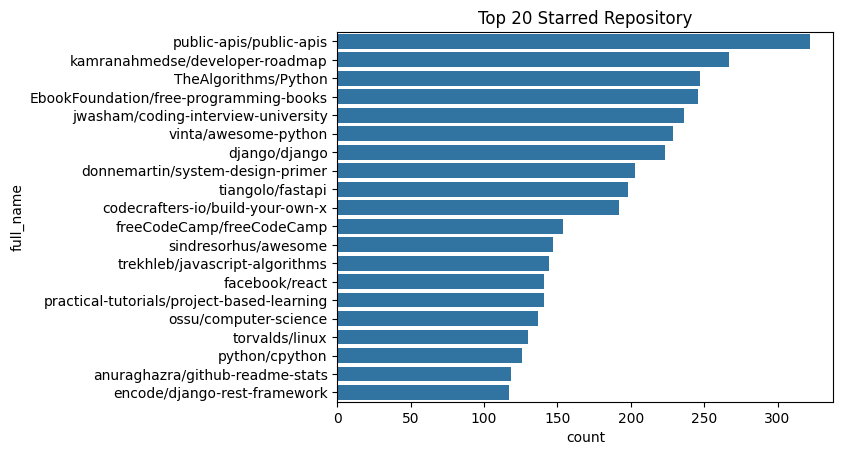

In [54]:
order = starred_data['full_name'].value_counts()[:20].index
sns.countplot(data=starred_data, y='full_name', order=order)
plt.title('Top 20 Starred Repository')
plt.show()

In [55]:
for x in starred_data['full_name'].value_counts()[:20].index.to_list():
    query = starred_data[starred_data['full_name'] == x]
    print(x, '\n:', query['description'].iloc[0], '\n')

public-apis/public-apis 
: A collective list of free APIs 

kamranahmedse/developer-roadmap 
: Interactive roadmaps/guides and other educational content to help developers grow in their careers. 

TheAlgorithms/Python 
: All Algorithms implemented in Python 

EbookFoundation/free-programming-books 
: :books: Freely available programming books 

jwasham/coding-interview-university 
: A complete computer science study plan to become a software engineer. 

vinta/awesome-python 
: A curated list of awesome Python frameworks/libraries/software and resources 

django/django 
: The Web framework for perfectionists with deadlines. 

donnemartin/system-design-primer 
: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards. 

tiangolo/fastapi 
: FastAPI framework/high performance/easy to learn/fast to code/ready for production 

codecrafters-io/build-your-own-x 
: Master programming by recreating your favorite technologies from scratch. 

freeCo